In [1]:
!nvidia-smi

Fri Sep 29 20:48:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/Deep_Learning_Based_Chatbot')
os.getcwd()

'/content/drive/MyDrive/Deep_Learning_Based_Chatbot'

In [4]:
data_path = "/content/drive/MyDrive/Deep_Learning_Based_Chatbot/job_intents.json"

In [5]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
import tensorflow as tf
import json
import pickle
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random
import pandas as pd
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# Text Preprocessing

In [45]:
words=[] #all unique words
classes = []  #all classes in the data
documents = [] #all input with label
ignore_words = ['?', '!']

data_file = open(data_path, encoding='utf-8').read()
intents = json.loads(data_file)

In [46]:
#  below is the content of the input data
intents

{'intents': [{'tag': 'greeting',
   'patterns': ['Hi there',
    'How are you',
    'Is anyone there?',
    'Hey',
    'Hola',
    'Hello',
    'Good day',
    'Hey',
    'Ekse',
    'Hi'],
   'responses': ['Hi stranger',
    'Yebo yes, how can I help',
    'Ey watsupp',
    'Ekse Hoezit',
    'Hola',
    'Hey dude',
    'You again']},
  {'tag': 'goodbye',
   'patterns': ['Bye', 'See you later', 'Goodbye', 'Ok bye', 'Bye Bye'],
   'responses': ['See you!',
    'Have a nice day',
    'Sure Bye',
    'Later dude',
    'Sayoonara',
    'Peace out',
    'Sure dude',
    'Ciao']},
  {'tag': 'thanks',
   'patterns': ['Thanks',
    'Thank you',
    "That's helpful",
    'Awesome, thanks',
    'Thanks for helping me'],
   'responses': ['Happy to help!',
    'Any time!',
    'My pleasure',
    'You are welcome',
    'Sure dude']},
  {'tag': 'noanswer',
   'patterns': [],
   'responses': ["Sorry, can't understand you",
    'Please give me more info',
    'Not sure I understand',
    'I am still 

# Parsing the tags and the patterns from the input data and storing them in words, documents and classes

In [47]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        documents.append((w, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [48]:
# printing all words we have in our patterns
words

['Hi',
 'there',
 'How',
 'are',
 'you',
 'Is',
 'anyone',
 'there',
 '?',
 'Hey',
 'Hola',
 'Hello',
 'Good',
 'day',
 'Hey',
 'Ekse',
 'Hi',
 'Bye',
 'See',
 'you',
 'later',
 'Goodbye',
 'Ok',
 'bye',
 'Bye',
 'Bye',
 'Thanks',
 'Thank',
 'you',
 'That',
 "'s",
 'helpful',
 'Awesome',
 ',',
 'thanks',
 'Thanks',
 'for',
 'helping',
 'me',
 'What',
 'is',
 'your',
 'name',
 'Whats',
 'your',
 'name',
 'Tell',
 'me',
 'your',
 'name',
 'Who',
 'are',
 'you',
 'Ungubani',
 'Tell',
 'me',
 'about',
 'yourself',
 'You',
 'are',
 'What',
 'do',
 'you',
 'do',
 'How',
 'can',
 'you',
 'help',
 'What',
 'do',
 'you',
 'know',
 'What',
 'is',
 'your',
 'purpose',
 'How',
 'can',
 'you',
 'help',
 'South',
 'Africa',
 'What',
 'can',
 'you',
 'tell',
 'me',
 'about',
 'SA',
 'SA',
 'Tell',
 'me',
 'about',
 'SA',
 'What',
 'about',
 'SA',
 'What',
 'do',
 'you',
 'know',
 'about',
 'SA',
 'Tell',
 'me',
 'more',
 'about',
 'SA',
 'What',
 'can',
 'you',
 'tell',
 'me',
 'about',
 'South',
 'A

In [49]:
# printing all documents which is a tuple of words in the patterns and the tags
documents

[(['Hi', 'there'], 'greeting'),
 (['How', 'are', 'you'], 'greeting'),
 (['Is', 'anyone', 'there', '?'], 'greeting'),
 (['Hey'], 'greeting'),
 (['Hola'], 'greeting'),
 (['Hello'], 'greeting'),
 (['Good', 'day'], 'greeting'),
 (['Hey'], 'greeting'),
 (['Ekse'], 'greeting'),
 (['Hi'], 'greeting'),
 (['Bye'], 'goodbye'),
 (['See', 'you', 'later'], 'goodbye'),
 (['Goodbye'], 'goodbye'),
 (['Ok', 'bye'], 'goodbye'),
 (['Bye', 'Bye'], 'goodbye'),
 (['Thanks'], 'thanks'),
 (['Thank', 'you'], 'thanks'),
 (['That', "'s", 'helpful'], 'thanks'),
 (['Awesome', ',', 'thanks'], 'thanks'),
 (['Thanks', 'for', 'helping', 'me'], 'thanks'),
 (['What', 'is', 'your', 'name'], 'name'),
 (['Whats', 'your', 'name'], 'name'),
 (['Tell', 'me', 'your', 'name'], 'name'),
 (['Who', 'are', 'you'], 'name'),
 (['Ungubani'], 'name'),
 (['Tell', 'me', 'about', 'yourself'], 'name'),
 (['You', 'are'], 'name'),
 (['What', 'do', 'you', 'do'], 'options'),
 (['How', 'can', 'you', 'help'], 'options'),
 (['What', 'do', 'you', 

In [50]:
# printing all classes which are tags in the input data

classes

['greeting',
 'goodbye',
 'thanks',
 'name',
 'options',
 'south_africa_info',
 'India_info',
 'Canada_info',
 'south_africa_facts']

In [51]:
lemmatizer = WordNetLemmatizer()

In [52]:
# converting token/words into lower case before doing lemmatization
lm_words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]

In [53]:
# printing words and lemmatize words
print(words,"\n",lm_words)

['Hi', 'there', 'How', 'are', 'you', 'Is', 'anyone', 'there', '?', 'Hey', 'Hola', 'Hello', 'Good', 'day', 'Hey', 'Ekse', 'Hi', 'Bye', 'See', 'you', 'later', 'Goodbye', 'Ok', 'bye', 'Bye', 'Bye', 'Thanks', 'Thank', 'you', 'That', "'s", 'helpful', 'Awesome', ',', 'thanks', 'Thanks', 'for', 'helping', 'me', 'What', 'is', 'your', 'name', 'Whats', 'your', 'name', 'Tell', 'me', 'your', 'name', 'Who', 'are', 'you', 'Ungubani', 'Tell', 'me', 'about', 'yourself', 'You', 'are', 'What', 'do', 'you', 'do', 'How', 'can', 'you', 'help', 'What', 'do', 'you', 'know', 'What', 'is', 'your', 'purpose', 'How', 'can', 'you', 'help', 'South', 'Africa', 'What', 'can', 'you', 'tell', 'me', 'about', 'SA', 'SA', 'Tell', 'me', 'about', 'SA', 'What', 'about', 'SA', 'What', 'do', 'you', 'know', 'about', 'SA', 'Tell', 'me', 'more', 'about', 'SA', 'What', 'can', 'you', 'tell', 'me', 'about', 'South', 'Africa', 'Tell', 'me', 'about', 'South', 'Africa', 'What', 'about', 'South', 'Africa', 'What', 'do', 'you', 'know', 

In [54]:
lm_words = sorted(list(set(lm_words)))
lm_words

["'s",
 ',',
 'about',
 'africa',
 'anyone',
 'are',
 'awesome',
 'bye',
 'can',
 'canada',
 'day',
 'do',
 'ekse',
 'fact',
 'for',
 'give',
 'good',
 'goodbye',
 'hello',
 'help',
 'helpful',
 'helping',
 'hey',
 'hi',
 'hola',
 'how',
 'india',
 'interesting',
 'is',
 'know',
 'later',
 'me',
 'more',
 'name',
 'ok',
 'purpose',
 'sa',
 'see',
 'some',
 'something',
 'south',
 'tell',
 'thank',
 'thanks',
 'that',
 'there',
 'ungubani',
 'what',
 'whats',
 'who',
 'you',
 'your',
 'yourself']

In [40]:
classes = sorted(list(set(classes)))

print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(lm_words), "unique lemmatized words", lm_words)

77 documents
9 classes ['Canada_info', 'India_info', 'goodbye', 'greeting', 'name', 'options', 'south_africa_facts', 'south_africa_info', 'thanks']
53 unique lemmatized words ["'s", ',', 'about', 'africa', 'anyone', 'are', 'awesome', 'bye', 'can', 'canada', 'day', 'do', 'ekse', 'fact', 'for', 'give', 'good', 'goodbye', 'hello', 'help', 'helpful', 'helping', 'hey', 'hi', 'hola', 'how', 'india', 'interesting', 'is', 'know', 'later', 'me', 'more', 'name', 'ok', 'purpose', 'sa', 'see', 'some', 'something', 'south', 'tell', 'thank', 'thanks', 'that', 'there', 'ungubani', 'what', 'whats', 'who', 'you', 'your', 'yourself']


In [41]:
# saving lemmatized words in words.pkl and classes in classes.pkl file

pickle.dump(lm_words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

# Feature Engineering / Text representation

Using One Hot Encoding

In [55]:
# initializing training data
training = []
# output_empty list is initialized with all 0's based on the number of classes we have
output_empty = [0] * len(classes)

In [24]:
output_empty

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [56]:
for doc in documents:
  print(doc)

(['Hi', 'there'], 'greeting')
(['How', 'are', 'you'], 'greeting')
(['Is', 'anyone', 'there', '?'], 'greeting')
(['Hey'], 'greeting')
(['Hola'], 'greeting')
(['Hello'], 'greeting')
(['Good', 'day'], 'greeting')
(['Hey'], 'greeting')
(['Ekse'], 'greeting')
(['Hi'], 'greeting')
(['Bye'], 'goodbye')
(['See', 'you', 'later'], 'goodbye')
(['Goodbye'], 'goodbye')
(['Ok', 'bye'], 'goodbye')
(['Bye', 'Bye'], 'goodbye')
(['Thanks'], 'thanks')
(['Thank', 'you'], 'thanks')
(['That', "'s", 'helpful'], 'thanks')
(['Awesome', ',', 'thanks'], 'thanks')
(['Thanks', 'for', 'helping', 'me'], 'thanks')
(['What', 'is', 'your', 'name'], 'name')
(['Whats', 'your', 'name'], 'name')
(['Tell', 'me', 'your', 'name'], 'name')
(['Who', 'are', 'you'], 'name')
(['Ungubani'], 'name')
(['Tell', 'me', 'about', 'yourself'], 'name')
(['You', 'are'], 'name')
(['What', 'do', 'you', 'do'], 'options')
(['How', 'can', 'you', 'help'], 'options')
(['What', 'do', 'you', 'know'], 'options')
(['What', 'is', 'your', 'purpose'], 'op

In [60]:
# where ever we get the pattern
for doc in documents:
    bag = []
    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    for w in lm_words:
        bag.append(1) if w in pattern_words else bag.append(0)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])

In [61]:
training

[[[0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0]],
 [[0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0]],
 [[0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0

In [62]:
random.shuffle(training)
training = np.array(training)

<ipython-input-62-cc0bc1dae1db>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


In [63]:
training.shape

(77, 2)

In [64]:
# create train and test lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])

VALIDATION_SET = (train_x, train_y)

# Modeling & Evaluation
using ANN

In [66]:
# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

In [67]:
# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
# sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
sgd = SGD(learning_rate=0.01,  momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [68]:
#fitting and saving the model
history = model.fit(np.array(train_x), np.array(train_y), epochs=250, validation_data = VALIDATION_SET, batch_size=5, verbose=1)

Epoch 1/250
16/16 [==============================] - 6s 19ms/step - loss: 2.2375 - accuracy: 0.1429 - val_loss: 2.0680 - val_accuracy: 0.4545
Epoch 2/250
16/16 [==============================] - 0s 9ms/step - loss: 2.0719 - accuracy: 0.2468 - val_loss: 1.9406 - val_accuracy: 0.3377
Epoch 3/250
16/16 [==============================] - 0s 7ms/step - loss: 1.9615 - accuracy: 0.3247 - val_loss: 1.7958 - val_accuracy: 0.4675
Epoch 4/250
16/16 [==============================] - 0s 8ms/step - loss: 1.7735 - accuracy: 0.4545 - val_loss: 1.5901 - val_accuracy: 0.6104
Epoch 5/250
16/16 [==============================] - 0s 8ms/step - loss: 1.6124 - accuracy: 0.4545 - val_loss: 1.3276 - val_accuracy: 0.7013
Epoch 6/250
16/16 [==============================] - 0s 8ms/step - loss: 1.4969 - accuracy: 0.5325 - val_loss: 1.1453 - val_accuracy: 0.7403
Epoch 7/250
16/16 [==============================] - 0s 7ms/step - loss: 1.2667 - accuracy: 0.6104 - val_loss: 0.9752 - val_accuracy: 0.7532
Epoch 8/250


<Axes: >

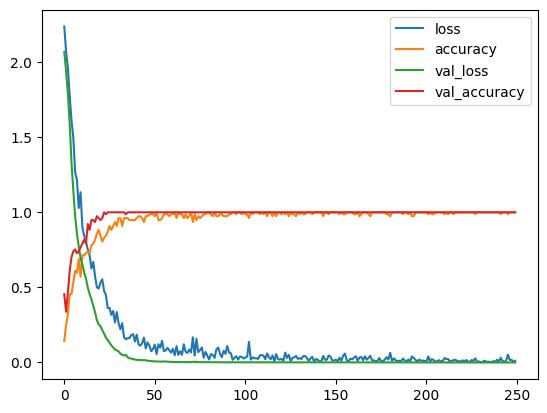

In [69]:
pd.DataFrame(history.history).plot()

In [70]:
model.save('chatbot_model1.h5', history)
print("model Saved")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


model Saved
